# Data visualisation

[Matplotlib](https://matplotlib.org) is the most commonly used visualisation library in Python. It provides 2D basic, statistical, coordinate and 3D plots. We shortly introduce matplotlib in this session, however, most visualisations will be done with [Seaborn](https://seaborn.pydata.org) which is based on `Matplotlib` with more sophisticated plot methods. Seaborn is built on top of Matplotlib and hides most low-level interactions with Matplotlib. With Seaborn similar visualisations can be achieved in different ways, which may seem confusing, but it also provides flexibility.


### Outline

- Data preparation :
    - Reshape : long and wide format
    - Join DataFrames : left/right/inner/outer
- Matplotlib basics
- Seaborn
    - Univariate plots
    - Bivariate plots
    - Axes-level and Grid-level
    - FacetGrid


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb # sns
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng(1234)

## Data preparation

We will use the dataset [Framingham Heart Study](https://www.framinghamheartstudy.org/) ([Wikipedia](https://en.wikipedia.org/wiki/Framingham_Heart_Study)) with 4434 observations:
  - categorical :
    - general: SEX, CURSMOKE, EDUC,
    - events : ANGINA, HOSPMI,  STROKE, CVD, HYPERTEN, DEATH
  - discrete : AGE, RANDID, HEARTRTE
  - continuous : SYSBP, DIABP, BPMEDS, BMI


In [3]:
fmh = pd.read_csv("data/framingham.csv")
fmh.dtypes

RANDID        int64
SEX           int64
AGE           int64
SYSBP       float64
DIABP       float64
BPMEDS      float64
CURSMOKE      int64
EDUC        float64
BMI         float64
HEARTRTE    float64
ANGINA        int64
HOSPMI        int64
STROKE        int64
CVD           int64
HYPERTEN      int64
DEATH         int64
dtype: object

### Reshape

Same data may be organised in different ways depending on the context. Columns may become categories (long format) and vice versa, categories will become columns (wide format). Often data must be transformed into the proper shape for visualisation.


#### Wide to long : `pd.melt`

**Synopsis: &nbsp; &nbsp;**<tt>pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value')</tt>
- frame: DataFrame to reshape
- id_vars : variables to be kept
- value_vars : variables to be collected as a new categorical variable
- var_name : category name
- value_name : category values

To illustrate we will take a small sample of three events {ANGINA,CVD,DEATH} along with the `RANDID`:

In [10]:
df = fmh[["RANDID", "ANGINA", "CVD", "DEATH"]]
df

,RANDID,ANGINA,CVD,DEATH
0,2448,0,1,0
1,9428,0,0,0
2,14367,0,0,0
3,16365,0,0,0
4,20375,0,0,0
...,...,...,...,...
4429,9978986,0,0,0
4430,9990894,0,0,1
4431,9993179,0,0,1
4432,9995546,1,1,0


In [11]:
pd.melt(frame=df,id_vars='RANDID',value_vars=['ANGINA','CVD','DEATH'], var_name='event',value_name='value')

,RANDID,event,value
0,2448,ANGINA,0
1,9428,ANGINA,0
2,14367,ANGINA,0
3,16365,ANGINA,0
4,20375,ANGINA,0
...,...,...,...
13297,9978986,DEATH,0
13298,9990894,DEATH,1
13299,9993179,DEATH,1
13300,9995546,DEATH,0


In [8]:
df = fmh[["RANDID", "ANGINA", "CVD", "DEATH"]].head(3)

In [16]:
df_long = pd.melt(frame=df, id_vars='RANDID', value_vars=["ANGINA", "CVD", "DEATH"], var_name='EVENT', value_name='VALUE')
df_long

,RANDID,EVENT,VALUE
0,2448,ANGINA,0
1,9428,ANGINA,0
2,14367,ANGINA,0
3,16365,ANGINA,0
4,20375,ANGINA,0
...,...,...,...
13297,9978986,DEATH,0
13298,9990894,DEATH,1
13299,9993179,DEATH,1
13300,9995546,DEATH,0


In [18]:
import  matplotlib.pyplot as ply

In [ ]:
d = rng.stand

#### Long to wide : `pivot`


**Synopsis: &nbsp; &nbsp;**<tt>DataFrame.pivot(index=None, columns=None, values=None)</tt>
- index : column to set as index
- columns : variable containing the column names
- values : variable containing the values all

In [6]:
df_wide = df_long.pivot(index='RANDID', columns='EVENT', values='VALUE') # .reset_index().rename_axis(None,axis=1)

## Join DataFrames

We have already seen how to concatenate (`pd.concat`) DataFrames on a certain axis. There are situations where we would like to join DataFrames based on values of variable(s) also known as `key(s)`. This can be done with the function `DataFrame.merge`

**Synopsis: &nbsp; &nbsp;**<tt>DataFrame.merge(DataFrame.merge(right, how='inner', on=None,...)</tt>
- right: the other DataFrame
- how: {left, right, outer, inner}


In [4]:
import names
name_pool =  [names.get_first_name() for _ in range(10)]
df1 = pd.DataFrame({'name': rng.choice(name_pool,5, replace=False) , 'age':  rng.choice(range(18,80),5) })
df2 = pd.DataFrame({'name': rng.choice(name_pool,5, replace=False) , 'height':  rng.choice(range(150,190),5) })

In [ ]:
df1.merge(df2, how='left', on='name')

## Matplotlib basics

Matplotlib organises plots in a `figure` and within each figure you may have multiple plots called `subplots`.


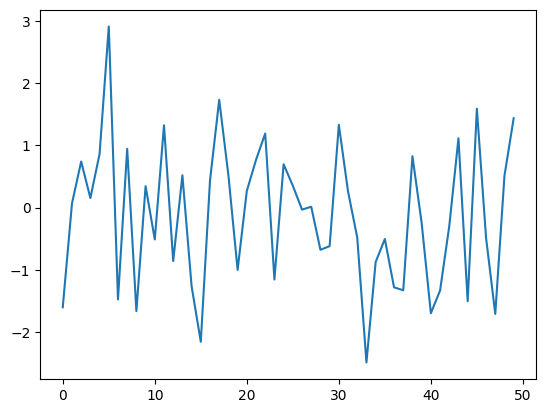

In [19]:
# single plot
x_ = rng.standard_normal(50)
plt.plot(x_);

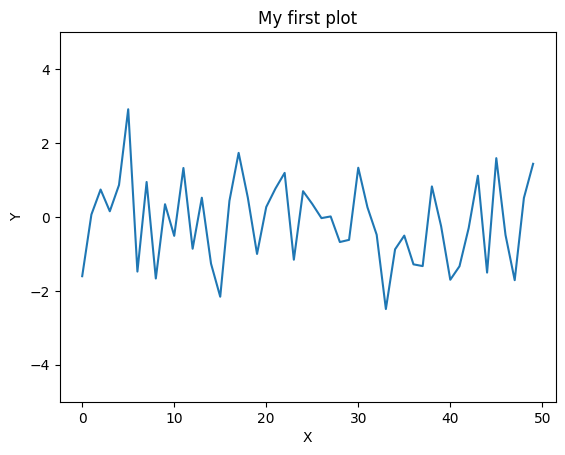

In [ ]:
# single plot
fig = plt.figure()        # figsize = (10,5)
ax = fig.add_subplot()
ax.plot(x_)
ax.set_title('My first plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylim([-5,5]);

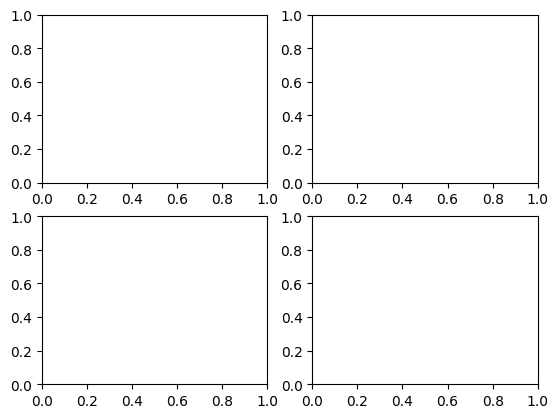

In [ ]:
x_ = rng.standard_normal(50)
y_ = rng.standard_normal(50)
fig, axes = plt.subplots(2,2)  # fig, axes = plt.subplots(2,2) fig and axes means two objects, 4 figures

In [23]:
type(fig), type(axes)

(matplotlib.figure.Figure, numpy.ndarray)

In [24]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x3088e4550>,
 'caps': [<matplotlib.lines.Line2D at 0x3088e47d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3088e4410>,
 'medians': [<matplotlib.lines.Line2D at 0x3088e4a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x3088e4b90>,
 'means': []}

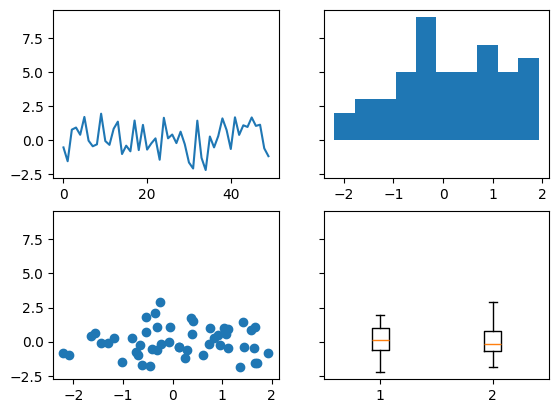

In [ ]:
# multiple plots
x_ = rng.standard_normal(50)
y_ = rng.standard_normal(50)
fig, axes = plt.subplots(2,2,sharey=True) # types Figure & Axes
                              # options sharex, sharey and figure options, e.g. figsize=[8,7]              
axes[0,0].plot(x_)
axes[0,1].hist(x_)
axes[1,0].scatter(x_,y_)
axes[1,1].boxplot([x_,y_])

{'whiskers': [<matplotlib.lines.Line2D at 0x3080b9810>,
 'caps': [<matplotlib.lines.Line2D at 0x3080b9d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x3080b91d0>,
 'medians': [<matplotlib.lines.Line2D at 0x3080b9a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x3080b9950>,
 'means': []}

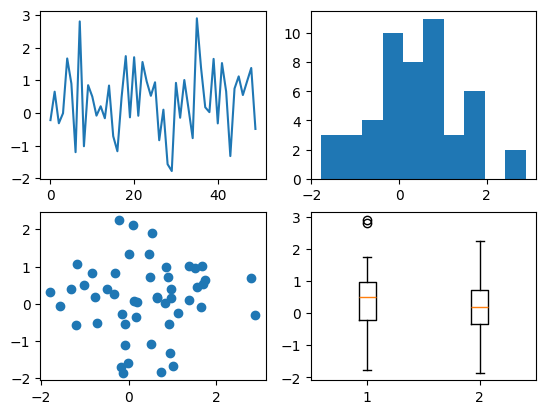

In [ ]:
# multiple plots
x_ = rng.standard_normal(50)
y_ = rng.standard_normal(50)
fig, axes = plt.subplots(2,2) # types Figure & Axes
                              # options sharex, sharey and figure options, e.g. figsize=[8,7]
axes[0,0].plot(x_)
axes[0,1].hist(x_)
axes[1,0].scatter(x_,y_)
axes[1,1].boxplot([x_,y_])


## Seaborn

The Seaborn library is organised with modules focussing on  [relational](https://seaborn.pydata.org/tutorial/relational.html), [distributional](https://seaborn.pydata.org/tutorial/distributions.html) and [categorical](https://seaborn.pydata.org/tutorial/categorical.html) topics. These modules provide the so-called figure-level plots whereas corresponding plots in the base Seaborn are axes-level plots.


**Axes-level Synopsis:** nbsp; &nbsp;**<tt>sb.{plot-func}(data, x, y, hue, ...)</tt>

**Figure-level Synopsis:** nbsp; &nbsp;**<tt>sb.{relplot | catplot | displot}(data, x, y, hue, kind,  ...)</tt>

    - data: DataFrame, ...
    - x,y: are variables inside data to be plotted
    - hue: grouping colours
    - kind : for each category a set of plots is defined, e.g. relplot(kind='line', ...)




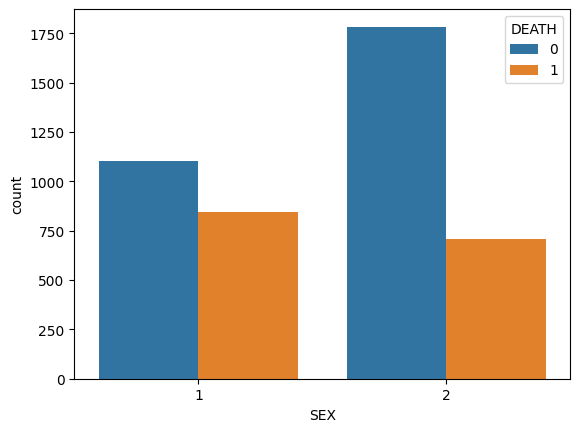

In [28]:
p = sb.countplot(data=fmh,x='SEX', hue='DEATH',) # y='SEX'

### Univariate plots

- continious: histogram, boxplot, violinplot, kdeplot, ecdfplot
- categorical : countplot

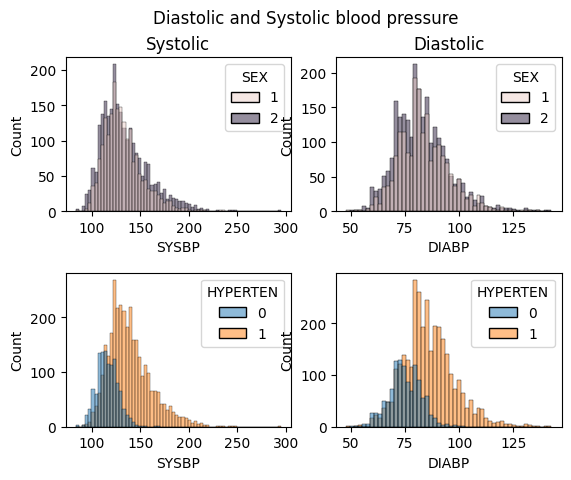

In [29]:
fig, axes = plt.subplots(2,2)
fig.suptitle("Diastolic and Systolic blood pressure")
axes[0,0].set_title("Systolic")
axes[0,1].set_title("Diastolic")

sb.histplot(data=fmh,x='SYSBP', hue='SEX', ax=axes[0,0])
sb.histplot(data=fmh,x='DIABP', hue='SEX', ax=axes[0,1])
sb.histplot(data=fmh,x='SYSBP', hue='HYPERTEN', ax=axes[1,0])
sb.histplot(data=fmh,x='DIABP', hue='HYPERTEN', ax=axes[1,1])

fig.subplots_adjust(hspace=.4)

<Axes: xlabel='SYSBP', ylabel='Count'>

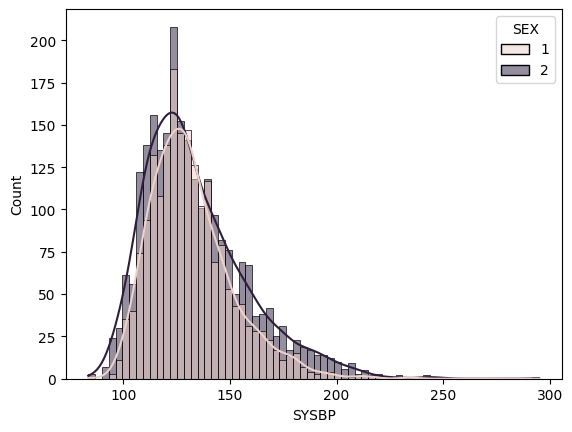

In [30]:
sb.histplot(data=fmh,x='SYSBP', hue='SEX', kde=True)

<Axes: ylabel='DIABP'>

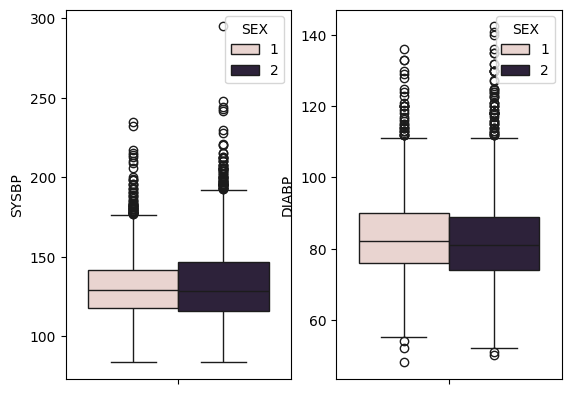

In [31]:
fig, axes = plt.subplots(1,2) #
sb.boxplot(data=fmh,y='SYSBP', hue='SEX', ax=axes[0])
sb.boxplot(data=fmh,y='DIABP', hue='SEX', ax=axes[1])

Text(0.5, 1.0, 'My density plot')

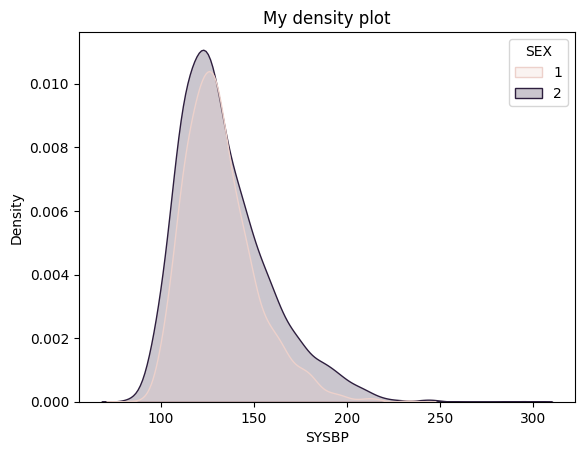

In [32]:
# kernel density estimate
ax = sb.kdeplot(data=fmh,x='SYSBP', hue='SEX', fill=True)
ax.set_title('My density plot')

In [ ]:
# empirical cumulative distribution function
sb.ecdfplot(data=fmh,x='SYSBP', hue='SEX')

### Bivariate plots

- continious: scatter, lmp, regplot, hexplot, pair, kde (bivariate),
- categorical : line, bar, point

In [ ]:
# lineplot
df = pd.DataFrame([(v,(v > fmh.SYSBP).sum()/fmh.SYSBP.size) for v in fmh.SYSBP], columns=['x','y'])
df.sort_values('x',inplace=True)
sb.lineplot(df, x='x',y='y')

In [ ]:
# lineplot
sb.lineplot(data=fmh, x='AGE', y='HEARTRTE')

In [ ]:
# violinplot
fig, axes = plt.subplots(1,2)
fig.tight_layout()
sb.violinplot(data=fmh,y='SYSBP', hue='SEX', ax=axes[0])
sb.violinplot(data=fmh,y='DIABP', hue='SEX', ax=axes[1])

In [ ]:
# barplot
ax = sb.barplot(data=fmh, x='AGE', y='HEARTRTE')
# Overlapping labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.tick_params(labelsize=7)
plt.tight_layout()

**Scatterplot**  This can also be achieved via `replot` which will be shown later, but to illustrate some arguments it is included here.

**Synopsis:** nbsp; &nbsp;**<tt>scatterplot(data, x, y, hue, style, palette, s, c, alpha)</tt>
- data : DataFrame
- x,y :  variables of interest
- hue :  categorical variable for colouring
- style : point style
- palette : colour scheme, e.g.  deep, muted, bright, pastel, dark, colorblind
- kwargs : s, alpha

In [ ]:
sb.scatterplot(fmh, x='SYSBP', y='DIABP')
sb.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX')
sb.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX', marker='+')
sb.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX', palette='colorblind')
sb.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX',style='ANGINA', palette='colorblind')
sb.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX',style='ANGINA', palette='colorblind', s=20)
sb.scatterplot(fmh, x='SYSBP', y='DIABP', hue='SEX',style='ANGINA', palette='colorblind', s=20, alpha=0.5)

In [ ]:
# histplot
sb.histplot(data=fmh,x='SYSBP',y='DIABP',  hue='SEX')

In [ ]:
# kdeplot
sb.kdeplot(fmh, x='SYSBP', y='DIABP') # cmap='Greys', fill=True

In [ ]:
# combine kdeplot and histplot
sb.kdeplot(fmh, x='SYSBP', y='DIABP', cmap='Greys')
sb.histplot(data=fmh,x='SYSBP',y='DIABP',  hue='SEX', palette="colorblind")

### Axes-level and Grid-level

In [ ]:
# axes-level lm
p =sb.regplot(fmh.sample(100), x='SYSBP', y='DIABP')

In [ ]:
# FacetGrid
p = sb.lmplot(fmh.sample(100), x='SYSBP', y='DIABP') # lowess requires statsmodels module ; line_kws={'color': 'red'}

In [ ]:
# FacetGrid
p = sb.relplot(fmh.sample(100), x='SYSBP', y='DIABP', row='SEX', col='EDUC', hue='ANGINA', style='CURSMOKE')

In [ ]:
# JointGrid
jg = sb.jointplot(fmh, x='SYSBP', y='DIABP', hue='SEX', kind='scatter') # 'scatter', 'hist', 'kde'
                                                                        # see jg.plot_joint(...) and jg.plot_marginals(...)

### FacetGrid

In [ ]:
fg = sb.FacetGrid(data=fmh,row='SEX', col='EDUC', hue="DEATH")
fg.map_dataframe(sb.scatterplot, x='SYSBP', y='DIABP')
fg.add_legend()

In [ ]:
sb.pairplot(data=fmh[['AGE','BMI','SYSBP','DIABP']])

In [ ]:
sb.heatmap(fmh[['SYSBP','DIABP','AGE','BMI','HEARTRTE']].corr(), cmap=sb.color_palette('colorblind'))

See [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for more  options.

In [ ]:
diamonds = pd.read_csv("data/diamonds.csv")
sb.heatmap(diamonds.select_dtypes(include=np.number).corr(),annot=True, linewidth=.01, cmap=sb.color_palette('colorblind'))